In [1]:
import json

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pingouin as pg

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

In [2]:
X_preproc_train = pd.read_csv('../data/crop_mapping/preprocessed_train.csv')
X_preproc_test = pd.read_csv('../data/crop_mapping/preprocessed_test.csv')

y_preproc_train = pd.read_csv('../data/crop_mapping/labels_train.csv')
y_preproc_test = pd.read_csv('../data/crop_mapping/labels_test.csv')

In [3]:
y_preproc_train.value_counts()

class
6        85074
3        75673
4        74067
5        47117
1        39162
2         3598
7         1143
Name: count, dtype: int64

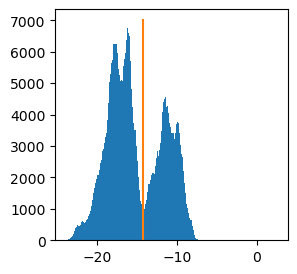

In [4]:
# For the time being we are using a certain segment of the data based on the distribution of sigHH. 
# This segment has univariate feature distributions much closer to Gaussian or log-Gaussian.
threshold = -14.25

fig, ax = plt.subplots(figsize=(3,3))
plt.hist(X_preproc_train['sigHH'], bins = 200)
plt.plot(threshold*np.ones(50), np.linspace(0, 7000, 50))
plt.show()

In [5]:
y_preproc_train.loc[X_preproc_train['sigHH'] < threshold].value_counts()

class
6        82495
4        72200
5        44815
3         2292
1         1228
2           59
Name: count, dtype: int64

In [6]:
X_train = X_preproc_train.loc[X_preproc_train['sigHH'] < threshold].reset_index(drop=True)
y_train = y_preproc_train.loc[X_preproc_train['sigHH'] < threshold].reset_index(drop=True)
X_test = X_preproc_test.loc[X_preproc_train['sigHH'] < threshold].reset_index(drop=True)
y_test = y_preproc_test.loc[X_preproc_train['sigHH'] < threshold].reset_index(drop=True)

In [7]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = pd.DataFrame(scaler.transform(X_train), columns=X_train.columns)
X_test = pd.DataFrame(scaler.transform(X_test), columns=X_train.columns)

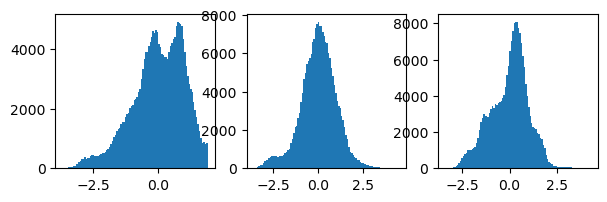

In [8]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['sigHH'], bins = 100)
axes[1].hist(X_train['sigHV'], bins = 100)
axes[2].hist(X_train['sigVV'], bins = 100)
plt.show()

In [9]:
# Start collecting new features

X_transformed_train = pd.concat([
    X_train['sigHH'].reset_index(drop=True), 
    X_train['sigHV'].reset_index(drop=True), 
    X_train['sigVV'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_test['sigHH'].reset_index(drop=True), 
    X_test['sigHV'].reset_index(drop=True), 
    X_test['sigVV'].reset_index(drop=True)
], axis=1)

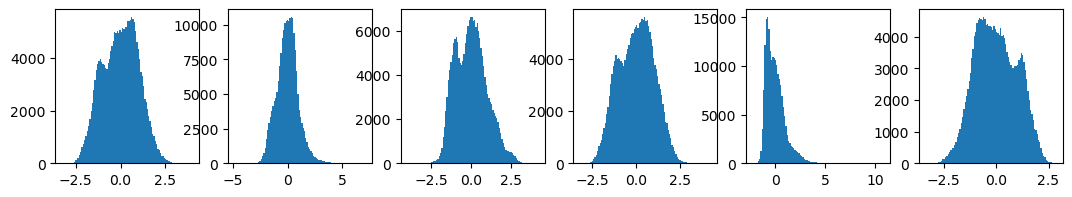

In [10]:
fig, axes = plt.subplots(1,6, figsize=(13,2))
axes[0].hist(X_train['Rhhvv'], bins = 100)
axes[1].hist(X_train['Rhvhh'], bins = 100)
axes[2].hist(X_train['Rhvvv'], bins = 100)
axes[3].hist(X_train['Rhh'], bins = 100)
axes[4].hist(X_train['Rhv'], bins = 100)
axes[5].hist(X_train['Rvv'], bins = 100)
plt.show()

In [11]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['Rhhvv'].reset_index(drop=True),
    X_train['Rhvhh'].reset_index(drop=True), 
    X_train['Rhvvv'].reset_index(drop=True),
    X_train['Rhh'].reset_index(drop=True),
    X_train['Rhv'].reset_index(drop=True), 
    X_train['Rvv'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['Rhhvv'].reset_index(drop=True),
    X_test['Rhvhh'].reset_index(drop=True), 
    X_test['Rhvvv'].reset_index(drop=True),
    X_test['Rhh'].reset_index(drop=True),
    X_test['Rhv'].reset_index(drop=True), 
    X_test['Rvv'].reset_index(drop=True)
], axis=1)

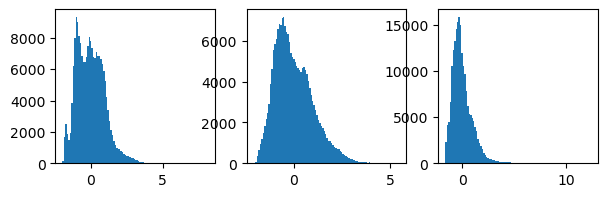

In [12]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['l1'], bins = 100)
axes[1].hist(X_train['l2'], bins = 100)
axes[2].hist(X_train['l3'], bins = 100)
plt.show()

In [13]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['l1'].reset_index(drop=True),
    X_train['l2'].reset_index(drop=True),
    X_train['l3'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['l1'].reset_index(drop=True),
    X_test['l2'].reset_index(drop=True),
    X_test['l3'].reset_index(drop=True)
], axis=1)

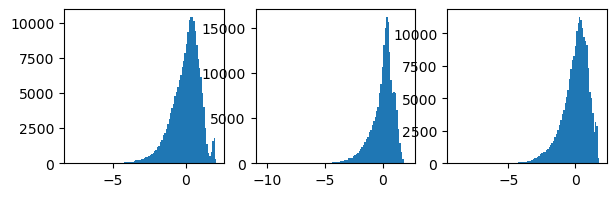

In [14]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['Ro12'], bins = 100)
axes[1].hist(X_train['Ro13'], bins = 100)
axes[2].hist(X_train['Ro23'], bins = 100)
plt.show()

In [15]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['Ro12'].reset_index(drop=True),
    X_train['Ro13'].reset_index(drop=True),
    X_train['Ro23'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['Ro12'].reset_index(drop=True),
    X_test['Ro13'].reset_index(drop=True),
    X_test['Ro23'].reset_index(drop=True)
], axis=1)

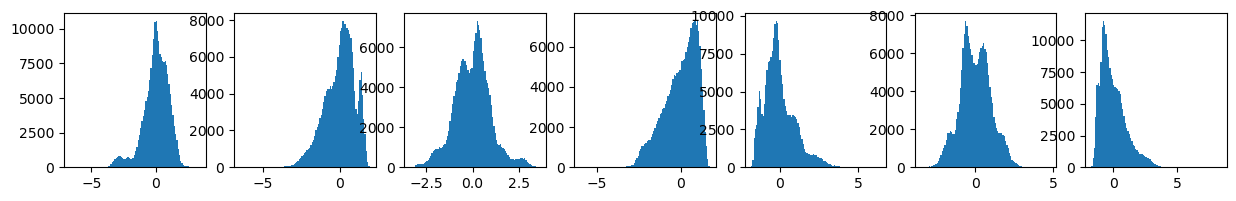

In [16]:
fig, axes = plt.subplots(1,7, figsize=(15,2))
axes[0].hist(X_train['H'], bins = 100)
axes[1].hist(X_train['A'], bins = 100)
axes[2].hist(X_train['a'], bins = 100)
axes[3].hist(X_train['HA'], bins = 100)
axes[4].hist(X_train['H1mA'], bins = 100)
axes[5].hist(X_train['1mHA'], bins = 100)
axes[6].hist(X_train['1mH1mA'], bins = 100)
plt.show()

In [17]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['H'].reset_index(drop=True),
    X_train['A'].reset_index(drop=True),
    X_train['a'].reset_index(drop=True),
    X_train['HA'].reset_index(drop=True),
    X_train['H1mA'].reset_index(drop=True),
    X_train['1mHA'].reset_index(drop=True),
    X_train['1mH1mA'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['H'].reset_index(drop=True),
    X_test['A'].reset_index(drop=True),
    X_test['a'].reset_index(drop=True),
    X_test['HA'].reset_index(drop=True),
    X_test['H1mA'].reset_index(drop=True),
    X_test['1mHA'].reset_index(drop=True),
    X_test['1mH1mA'].reset_index(drop=True)
], axis=1)

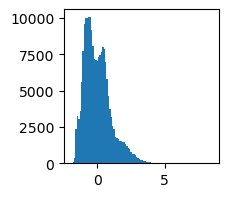

In [18]:
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(X_train['PH'], bins=100)
plt.show()

In [19]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['PH'].reset_index(drop=True),
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['PH'].reset_index(drop=True),
], axis=1)

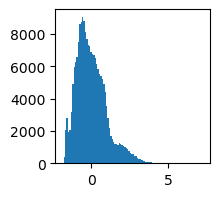

In [20]:
fig, ax = plt.subplots(figsize=(2,2))
plt.hist(X_train['rvi'], bins=100)
plt.show()

In [21]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['rvi'].reset_index(drop=True),
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['rvi'].reset_index(drop=True),
], axis=1)

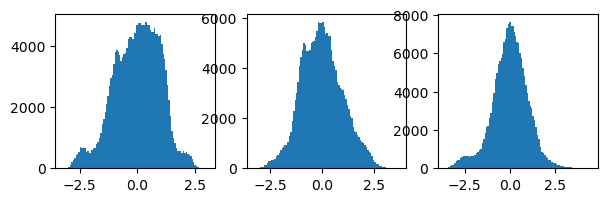

In [22]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['paulalpha'], bins = 100)
axes[1].hist(X_train['paulbeta'], bins = 100)
axes[2].hist(X_train['paulgamma'], bins = 100)
plt.show()

In [23]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['paulalpha'].reset_index(drop=True),
    X_train['paulbeta'].reset_index(drop=True),
    X_train['paulgamma'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['paulalpha'].reset_index(drop=True),
    X_test['paulbeta'].reset_index(drop=True),
    X_test['paulgamma'].reset_index(drop=True)
], axis=1)

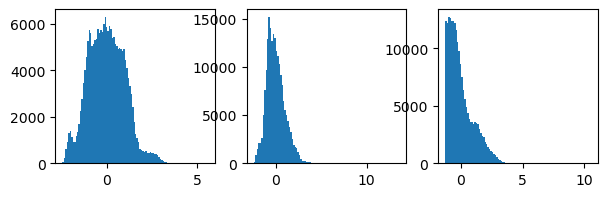

In [24]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['krogks'], bins = 100)
axes[1].hist(X_train['krogkd'], bins = 100)
axes[2].hist(X_train['krogkh'], bins = 100)
plt.show()

In [25]:
# E.g. drop krogkh since the selection cannot be transformed to a normal distribution
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['krogks'].reset_index(drop=True),
    X_train['krogkd'].reset_index(drop=True),
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['krogks'].reset_index(drop=True),
    X_test['krogkd'].reset_index(drop=True),
], axis=1)

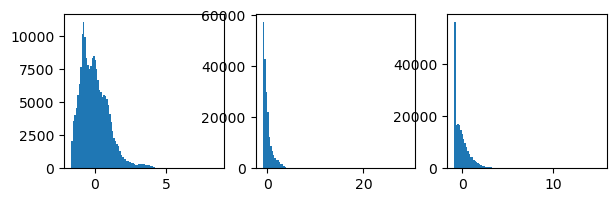

In [26]:
fig, axes = plt.subplots(1,3, figsize=(7,2))
axes[0].hist(X_train['freeodd'], bins = 100)
axes[1].hist(X_train['freedbl'], bins = 100)
axes[2].hist(X_train['freevol'], bins = 100)
plt.show()

In [27]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['freeodd'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['freeodd'].reset_index(drop=True)
], axis=1)

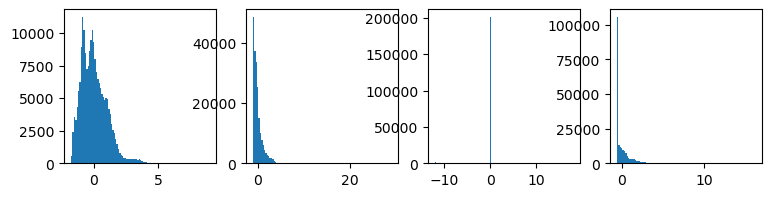

In [28]:
fig, axes = plt.subplots(1,4, figsize=(9,2))
axes[0].hist(X_train['yamodd'], bins = 100)
axes[1].hist(X_train['yamdbl'], bins = 100)
axes[2].hist(X_train['yamhlx'], bins = 100)
axes[3].hist(X_train['yamvol'], bins = 100)
plt.show()

In [29]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['yamodd'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['yamodd'].reset_index(drop=True)
], axis=1)

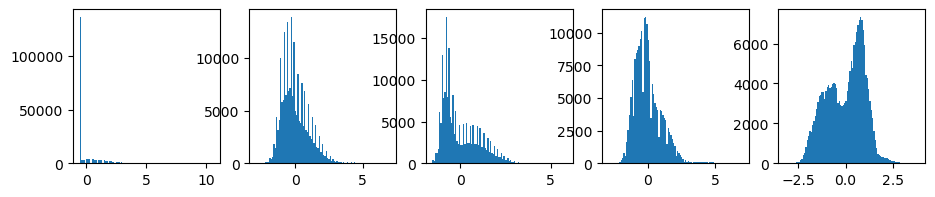

In [30]:
fig, axes = plt.subplots(1,5, figsize=(11,2))
axes[0].hist(X_train['B'], bins = 100)
axes[1].hist(X_train['G'], bins = 100)
axes[2].hist(X_train['R'], bins = 100)
axes[3].hist(X_train['Redge'], bins = 100)
axes[4].hist(X_train['NIR'], bins = 100)
plt.show()

In [31]:
X_transformed_train = pd.concat([
    X_transformed_train,
    X_train['G'].reset_index(drop=True),
    X_train['R'].reset_index(drop=True),
    X_train['Redge'].reset_index(drop=True),
    X_train['NIR'].reset_index(drop=True)
], axis=1)

X_transformed_test = pd.concat([
    X_transformed_test,
    X_test['G'].reset_index(drop=True),
    X_test['R'].reset_index(drop=True),
    X_test['Redge'].reset_index(drop=True),
    X_test['NIR'].reset_index(drop=True)
], axis=1)

In [32]:
# Normalize transformed distributions

X_tr_scaler = StandardScaler()
X_tr_scaler.fit(X_transformed_train)

X_transformed_train = pd.DataFrame(
    X_tr_scaler.transform(X_transformed_train), 
    columns=X_transformed_train.columns
)
X_transformed_test = pd.DataFrame(
    X_tr_scaler.transform(X_transformed_test), 
    columns=X_transformed_test.columns
)

In [33]:
X_transformed_train.head()

,sigHH,sigHV,sigVV,Rhhvv,Rhvhh,Rhvvv,Rhh,Rhv,Rvv,l1,...,paulbeta,paulgamma,krogks,krogkd,freeodd,yamodd,G,R,Redge,NIR
0,1.534650,2.784447,4.115965,-3.133641,2.861733,-0.630674,-3.104997,0.242073,2.689910,8.126485,...,3.719510,2.784447,3.371244,5.128501,-0.469461,2.235002,-0.330177,0.369321,-1.276626,-1.874834
1,1.639179,2.424456,3.438106,-2.169777,2.022738,-0.411114,-2.250070,0.244883,1.933056,5.663753,...,3.017513,2.424456,3.096686,4.036456,5.314710,4.120270,0.602488,0.634803,0.445117,-0.755381
2,1.280794,2.302097,3.276544,-2.420645,2.347731,-0.401689,-2.490702,0.338428,2.123913,5.023301,...,2.833735,2.302097,2.608307,3.498448,4.522716,3.442730,2.396074,1.218864,2.489687,-0.500960
3,1.756343,2.919561,3.845524,-2.524155,2.772912,-0.216005,-2.607873,0.631116,2.159177,7.039505,...,3.341469,2.919561,3.229521,4.213299,-0.048994,4.433876,-0.186690,0.103838,-0.684777,-0.826619
4,0.948829,1.993600,2.962200,-2.450188,2.280849,-0.466004,-2.511421,0.261960,2.160188,4.030188,...,2.439138,1.993600,2.152026,3.001045,3.684085,2.753547,0.243771,0.369321,0.552726,-0.908034


In [34]:
# Define a node structure grouping the transformed features
node_structure = {
    'sig': ['sigHH', 'sigHV', 'sigVV'],
    'R': ['Rhhvv', 'Rhvhh', 'Rhvvv', 'Rhh', 'Rhv', 'Rvv'],
    'Ro': ['Ro12', 'Ro13', 'Ro23'],
    'L': ['l1', 'l2', 'l3'],
    'HA': ['H', 'A', 'a', 'HA', 'H1mA', '1mHA', '1mH1mA'],
    'PH': ['PH'],
    'rvi': ['rvi'],
    'paul': ['paulalpha', 'paulbeta', 'paulgamma'],
    'krog': ['krogks', 'krogkd'],
    'free': ['freeodd'],
    'yam': ['yamodd'],
    'em': ['G', 'R', 'Redge', 'NIR']
}

In [35]:
with open('../data/crop_mapping/node_structure.json', 'w') as file:
    json.dump(node_structure, file)

X_transformed_train.to_csv('../data/crop_mapping/selection_features_train.csv', mode="w", index=False)
X_transformed_test.to_csv('../data/crop_mapping/selection_features_test.csv', mode="w", index=False)
y_train.to_csv('../data/crop_mapping/selection_labels_train.csv', mode="w", index=False)
y_test.to_csv('../data/crop_mapping/selection_labels_test.csv', mode="w", index=False)